# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [117]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

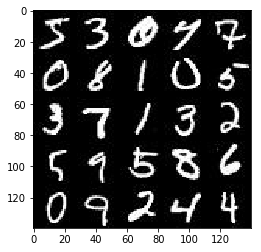

In [118]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

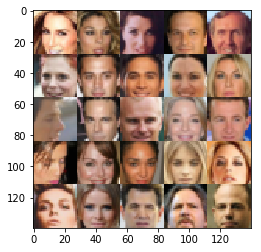

In [119]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

In [154]:
# Data preprocessing step is not given so added separately
def preprocess(images):
    images = (images - 0.0)/(255.0-0.0)
    images = images*2 - 1
    return images

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [120]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [121]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_image = tf.placeholder(shape=[None, image_width, image_height, image_channels], dtype=tf.float32)
    noise_z = tf.placeholder(shape=[None, z_dim], dtype=tf.float32)
    learning_rate = tf.placeholder(dtype=tf.float32)

    return real_image, noise_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [122]:
def discriminator(images, reuse=False, is_training=False, alpha = 0.02):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    
    with tf.variable_scope("discriminator", reuse=reuse):
        # initially 28x28x3 or 28x28x1
        
        x1 = tf.layers.conv2d(images, 8, 5, (2,2), padding='same', activation=None)
        x1 = tf.maximum(alpha*x1, x1)
        #now 14x14x8
        
        x2 = tf.layers.conv2d(x1, 16, 3, (2,2), padding='same', activation=None, use_bias=False)
        x2 = tf.layers.batch_normalization(x2, axis=3, training=is_training)
        x2 = tf.maximum(alpha*x2, x2)
        #now 7x7x16
        
        x3 = tf.layers.conv2d(x2, 32, 3, (2,2), padding='same', activation=None, use_bias=False)
        x3 = tf.layers.batch_normalization(x3, axis=3, training=is_training)
        x3 = tf.maximum(alpha*x3, x3)
        #now 4x4x32
        
        x4 = tf.layers.conv2d(x3, 64, 3, (2,2), padding='same', activation=None, use_bias=False)
        x4 = tf.layers.batch_normalization(x4, axis=3, training=is_training)
        x4 = tf.maximum(alpha*x4, x4)
        #now 2x2x64
        
        x5 = tf.layers.flatten(x4)
        
        logits = tf.layers.dense(x5, 1)
        op = tf.sigmoid(logits)
        
    return (op, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [155]:
def generator(z, out_channel_dim, is_train=True, alpha=0.02):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    # reuse all the generator network during the image generation (No training mode) and 
    #while training there will be no need to reuse as we are training it first
    
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        # initially e.g. 100 dim col vector
        g1 = tf.layers.dense(z, 3*3*128)
        g1 = tf.maximum(alpha*g1, g1)

        #print("g1", g1.get_shape().as_list())
        g1 = tf.reshape(g1, shape=[-1, 3, 3, 128])
        #print("g1-rs", g1.get_shape().as_list())
        # now 3x3x128


        g2 = tf.layers.conv2d_transpose(g1, 64, kernel_size=3, strides=(2,2), padding='valid', activation=None, use_bias=False)
        g2 = tf.layers.batch_normalization(g2, axis=3, training=is_train)
        g2 = tf.maximum(alpha*g2, alpha)
        #print("g2", g2.get_shape().as_list())
        # now 7x7x64

        g3 = tf.layers.conv2d_transpose(g2, 32, kernel_size=3, strides=(2,2), padding='same', activation=None, use_bias=False)
        g3 = tf.layers.batch_normalization(g3, axis=3, training=is_train)
        g3 = tf.maximum(alpha*g3, alpha)
        #print("g3", g3.get_shape().as_list())
        # now 14x14x32

        g4 = tf.layers.conv2d_transpose(g3, out_channel_dim, kernel_size=3, strides=(2,2), padding='same', activation=tf.nn.tanh, use_bias=True)
        #print("g4", g4.get_shape().as_list())
        # now 28x28x3

        return g4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [158]:
def model_loss(input_real, input_z, out_channel_dim, is_training=True):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g1 = generator(input_z, out_channel_dim, is_train=is_training, alpha=0.01)
        
    d_out_real, d_logits_real = discriminator(input_real, is_training=is_training, alpha=0.01)
    d_out_fake, d_logits_fake = discriminator(g1, is_training=is_training, alpha=0.01, reuse=True)
    
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_out_fake), logits=d_logits_fake))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_out_real), logits=d_logits_real))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_out_fake), logits=d_logits_fake))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [125]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    g_vars = [tf.trainable_variables(scope='generator')]
    d_vars = [tf.trainable_variables(scope='discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):    
        d_train = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return (d_train, g_train)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [126]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

# CHANGES ARE IN BELOW CELL

In [156]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    Z_val = np.random.uniform(-1, 1, size=[batch_size, z_dim])
    
    real_image_input, noise_of_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(real_image_input, noise_of_z, data_shape[3], is_training=True)
    
    d_train, g_train = model_opt(d_loss, g_loss, learn_rate, beta1)
        
    # ------- PREPROCESSING outside of EPOCH as this can be used for once --------
    for batch_images in get_batches(batch_size):
        preprocess(batch_images)
    # --------------
    # if possible use Extracted images and set up batch yourself and feed in 
    # to the model effectively
    # You can refer to generate bottleneck.txt files (refer retrain.py from TF)
    # this file generates bottleneck.txt which is nothing but extracting image data
    # and keeping in to some fast accessible format which later can be copied to GPU 
    # faster
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            i = 1
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                # preprocess(batch_images)
                d_run = sess.run(d_train, feed_dict={real_image_input: batch_images, noise_of_z: Z_val, learn_rate: learning_rate})
                g_run = sess.run(g_train, feed_dict={real_image_input: batch_images, noise_of_z: Z_val, learn_rate: learning_rate})
                
                if i % 100 == 0:  # ---- WHY THIS IS REQUIRED??? -------
                    disc_loss = sess.run(d_loss, feed_dict={real_image_input: batch_images, noise_of_z: Z_val})
                    gen_loss = sess.run(g_loss, feed_dict={noise_of_z: Z_val})
                    print("Batch :".format(i),
                          "Discriminator Loss: {}".format(disc_loss),
                          "Generative Loss: {}".format(gen_loss))
                    i += 1
                
            print("Epoch {}/{}".format(epoch_i, epoch_count),
                    "Discriminator Loss: {}".format(disc_loss),
                    "Generative Loss: {}".format(gen_loss))
            show_generator_output(sess, 20, noise_of_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Batch : Discriminator Loss: 1.4974825382232666 Generative Loss: 1.6051015853881836
Batch : Discriminator Loss: 1.2678592205047607 Generative Loss: 0.9942980408668518
Batch : Discriminator Loss: 1.2625389099121094 Generative Loss: 0.6116583347320557
Batch : Discriminator Loss: 1.3267111778259277 Generative Loss: 0.48551076650619507
Batch : Discriminator Loss: 1.3989267349243164 Generative Loss: 0.4304094910621643
Batch : Discriminator Loss: 1.391715168952942 Generative Loss: 0.45588698983192444
Batch : Discriminator Loss: 1.2721765041351318 Generative Loss: 1.1348755359649658
Batch : Discriminator Loss: 1.524855136871338 Generative Loss: 0.3364073932170868
Batch : Discriminator Loss: 1.0846832990646362 Generative Loss: 1.055583119392395
Batch : Discriminator Loss: 1.189635157585144 Generative Loss: 0.5355172753334045
Batch : Discriminator Loss: 1.2074302434921265 Generative Loss: 0.7417812347412109
Batch : Discriminator Loss: 1.2119392156600952 Generative Loss: 0.7445119619369507
Batch 

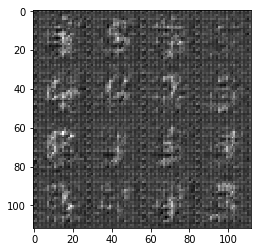

Batch : Discriminator Loss: 1.0466512441635132 Generative Loss: 0.7394001483917236
Batch : Discriminator Loss: 1.041873812675476 Generative Loss: 0.6488007307052612
Batch : Discriminator Loss: 1.3185628652572632 Generative Loss: 0.4772680997848511
Batch : Discriminator Loss: 0.9889534711837769 Generative Loss: 1.447718858718872
Batch : Discriminator Loss: 0.9259943962097168 Generative Loss: 0.9731439352035522
Batch : Discriminator Loss: 1.029201865196228 Generative Loss: 0.7743945717811584
Batch : Discriminator Loss: 0.8885579705238342 Generative Loss: 0.9473286867141724
Batch : Discriminator Loss: 1.112840175628662 Generative Loss: 0.7439439296722412
Batch : Discriminator Loss: 0.9967943429946899 Generative Loss: 1.6244025230407715
Batch : Discriminator Loss: 1.3961409330368042 Generative Loss: 0.39464497566223145
Batch : Discriminator Loss: 1.4288334846496582 Generative Loss: 0.8721839189529419
Batch : Discriminator Loss: 1.4053751230239868 Generative Loss: 0.3429195284843445
Batch :

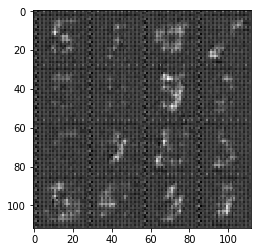

In [157]:
batch_size = 64
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = None
z_dim = None
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.